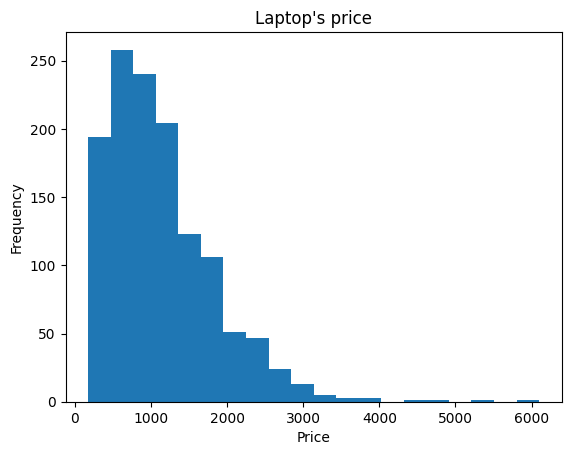

In [ ]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#get access to laptop-price – dataset
loaded_data=pd.read_csv('laptop_price - dataset.csv')

#The price's plot 
data = pd.to_numeric(loaded_data['Price (Euro)'], errors='coerce') #clean irelevent data
data = data.dropna()

plt.hist(data, bins=20)
plt.title("Laptop's price")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.show()

In [126]:
avg_price_by_company = loaded_data.groupby('Company')['Price (Euro)'].mean() #mean's calculation for each company
max_price = avg_price_by_company.max()#caculating the max  mean
company_name = avg_price_by_company.idxmax()#getting the max company name
print("The compny with the highest mean :",company_name,"and it's value:" ,max_price)
print(avg_price_by_company)#printing the means list

The compny with the highest mean : Razer and it's value: 3346.1428571428573
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64


In [115]:

OpSys_df = loaded_data["OpSys"].replace("Mac OS X", "macOS")#replaces Mac OS X to macOS
OpSys_df_2 = OpSys_df.replace("Windows 10 S", "Windows 10")#replaces Windows 10 S to Windows 10
OpSys_array=OpSys_df_2.unique()#returns all companies unique names
print(OpSys_array)


['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


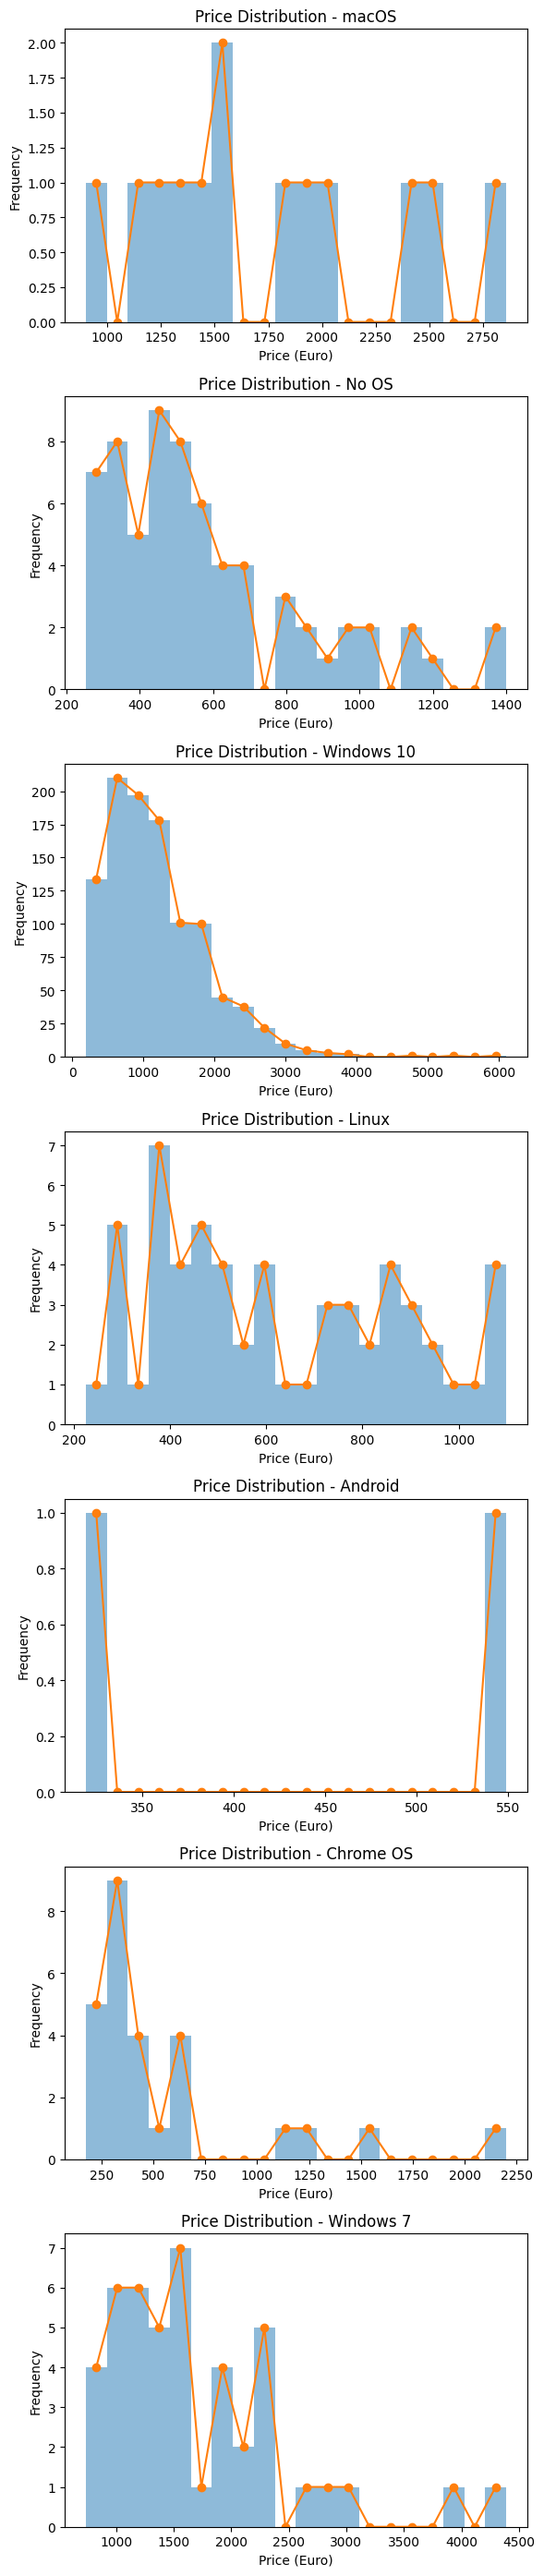

In [ ]:
#The price distribution for each kind of OpSys according to the previous question
n = len(OpSys_array)

fig, axes = plt.subplots(n, 1, figsize=(6, 4*n))

for ax, os in zip(axes, OpSys_array):
    subset = loaded_data[loaded_data['OpSys'] == os]

    # cleaning prices
    prices = pd.to_numeric(subset['Price (Euro)'], errors='coerce').dropna()

    # making the histogram
    counts, bins, _ = ax.hist(prices, bins=20, alpha=0.5)

    # caculating the center of each company
    bins_centers = (bins[:-1] + bins[1:]) / 2

    # creating the frequency polygon
    ax.plot(bins_centers, counts, marker='o') 

    ax.set_title(f'Price Distribution - {os}')
    ax.set_xlabel('Price (Euro)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

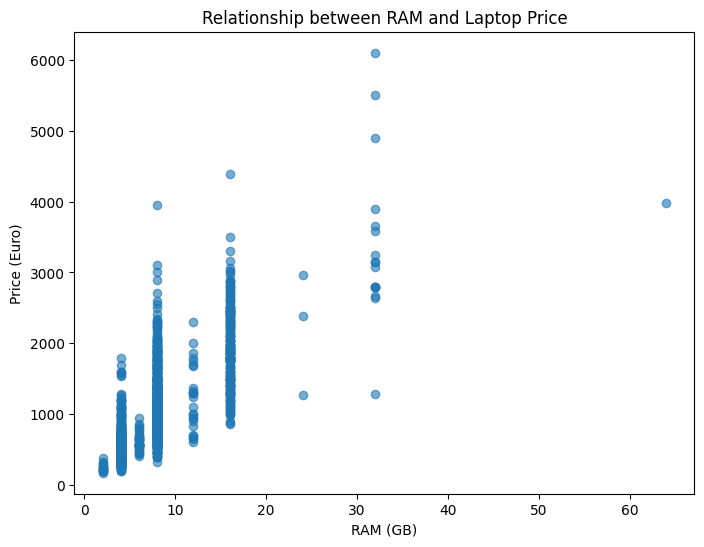

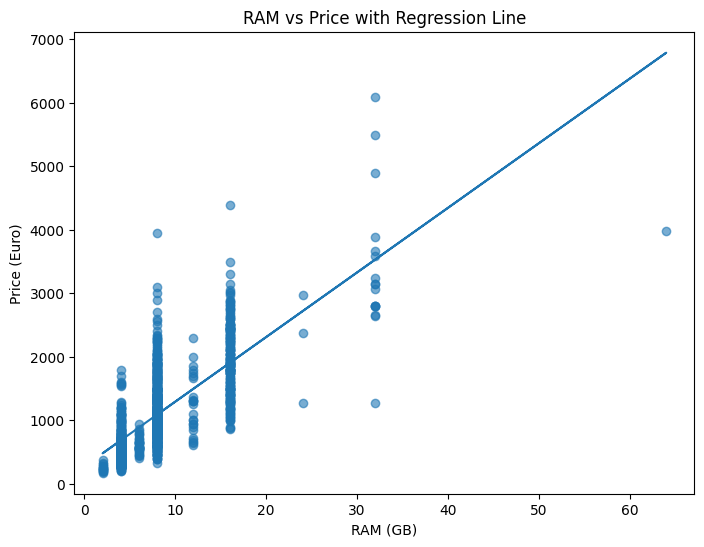

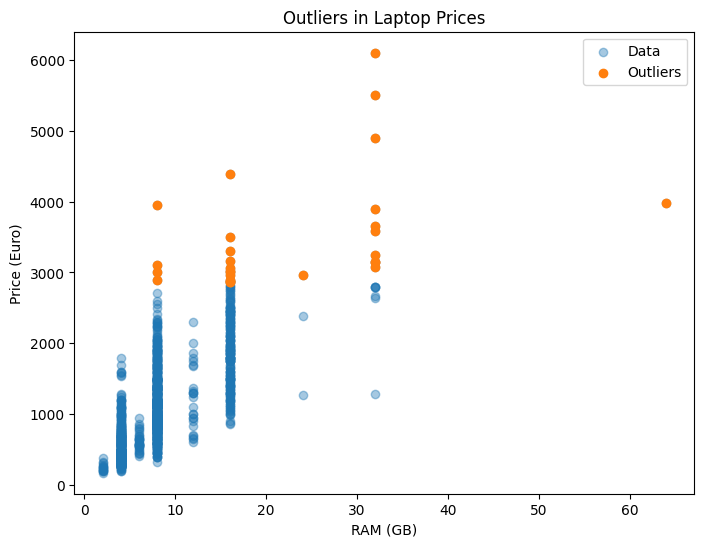

In [128]:
# making sure the prices are final 
loaded_data['Price (Euro)'] = pd.to_numeric( loaded_data['Price (Euro)'], errors='coerce')

#Creating the polt that shows the connection between RAM and laptop's price
plt.figure(figsize=(8,6))
plt.scatter(loaded_data['RAM (GB)'],loaded_data['Price (Euro)'],alpha=0.6)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship between RAM and Laptop Price')
plt.show()

df_clean = loaded_data[['RAM (GB)', 'Price (Euro)']].dropna()

x = df_clean['RAM (GB)']
y = df_clean['Price (Euro)']

# Adding linear regression
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6)
plt.plot(x, m*x + b)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('RAM vs Price with Regression Line')
plt.show()

Q1 = loaded_data['Price (Euro)'].quantile(0.25)# caculating the first Inter-quarterly range
Q3 = loaded_data['Price (Euro)'].quantile(0.75)#caculating the third Inter-quarterly range
IQR = Q3 - Q1#The Inter-quarterly range

lower = Q1 - 1.5 * IQR #caculating  all exceptions in the lower range
upper = Q3 + 1.5 * IQR #caculating  all exceptions in the lower range

outliers = loaded_data[
    (loaded_data['Price (Euro)'] < lower) |
    (loaded_data['Price (Euro)'] > upper)
]
#A plot that shows the outliers 
plt.figure(figsize=(8,6))

plt.scatter(
    loaded_data['RAM (GB)'],
    loaded_data['Price (Euro)'],
    alpha=0.4,
    label='Data'
)

plt.scatter(
    outliers['RAM (GB)'],
    outliers['Price (Euro)'],
    label='Outliers'
)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Outliers in Laptop Prices')
plt.legend()
plt.show()


In [ ]:
#creats new column named 'Storage type' 
loaded_data['Storage type'] = loaded_data['Memory'].str.extract(r'(SSD|HDD|Flash)', expand=False)
#returns thstorage type 
def extract_storage(mem):
    if pd.isna(mem):
        return np.nan
    if 'SSD' in mem and 'HDD' in mem:
        return 'SSD+HDD'
    if 'SSD' in mem:
        return 'SSD'
    if 'HDD' in mem:
        return 'HDD'
    if 'Flash' in mem:
        return 'Flash Storage'
    if 'Hybrid' in mem:
        return 'Other'

loaded_data['Storage type'] = loaded_data['Memory'].apply(extract_storage)#applies new column for every laptop
loaded_data

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage_Type,Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00,SSD,SSD
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00,SSD,SSD
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00,Flash,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00,HDD,HDD
